In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 

warnings.filterwarnings('ignore')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
from tensorflow.keras.layers import Dense,BatchNormalization,Conv2D,Dropout,MaxPool2D,Flatten
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.applications.vgg16 import decode_predictions,preprocess_input
from tensorflow.keras.optimizers import Adam

In [19]:
data = pd.read_csv('train.csv')

In [20]:
import tensorflow

In [21]:
tensorflow.__version__

'2.0.0-rc0'

In [22]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
data.tail()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
7249,tt2409818,"['Action', 'Crime', 'Thriller']",1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7250,tt2062622,"['Animation', 'Comedy', 'Family']",0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7251,tt2442502,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7252,tt3455850,['Documentary'],0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7253,tt4179482,['Animation'],0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [25]:
from tqdm  import tqdm

In [26]:
img_width = 350
img_height = 350
x = []
for i in tqdm(range(data.shape[0])):



  file_path = 'Images/' + data['Id'][i] + '.jpg'
  image = load_img(file_path,target_size=(200,200,3))
  image = img_to_array(image)
  image = image/255.0
  x.append(image)

x = np.array(x)

100%|██████████| 7254/7254 [00:17<00:00, 422.49it/s]


In [27]:
x.shape

(7254, 200, 200, 3)

In [28]:
x.shape[0],x.shape

(7254, (7254, 200, 200, 3))

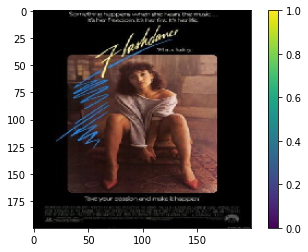

In [29]:
plt.imshow(x[1])
plt.colorbar()

In [30]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [31]:
y = data.drop(columns=['Id','Genre'])
y  = y.to_numpy()

In [32]:
y.shape

(7254, 25)

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.85,random_state=42)

In [34]:
x_train.shape

(6165, 200, 200, 3)

In [35]:
x_test.shape

(1089, 200, 200, 3)

## Build The CNN Model.

In [36]:
from tensorflow.keras import Sequential

In [37]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=[200,200,3]))
model.add(BatchNormalization())
model.add(Dropout(0.40))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=[200,200,3]))
model.add(BatchNormalization())
model.add(Dropout(0.40))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=[200,200,3]))
model.add(BatchNormalization())
model.add(Dropout(0.40))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=[200,200,3]))
model.add(BatchNormalization())
model.add(Dropout(0.40))
model.add(MaxPool2D(2,2))

model.add(Conv2D(256,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=[200,200,3]))
model.add(BatchNormalization())
model.add(Dropout(0.40))
model.add(MaxPool2D(2,2))


model.add(Flatten())
model.add(Dense(200,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.40))


model.add(Dense(200,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.40))

model.add(Dense(25,activation='sigmoid',kernel_initializer='he_uniform'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 200, 200, 16)      64        
_________________________________________________________________
dropout (Dropout)            (None, 200, 200, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 32)      0

In [39]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
history = model.fit(x_train,y_train,batch_size=25,epochs=4,verbose=1,validation_data=(x_test,y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/4
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
6165/6165 [==============================] - 673s 109ms/sample - loss: 0.5720 - accuracy: 0.7278 - val_loss: 1.1372 - val_accuracy: 0.7578
Epoch 2/4
6165/6165 [==============================] - 683s 111ms/sample - loss: 0.2675 - accuracy: 0.9056 - val_loss: 0.4059 - val_accuracy: 0.9027
Epoch 3/4
6165/6165 [==============================] - 607s 99ms/sample - loss: 0.2527 - accuracy: 0.9101 - val_loss: 0.4067 - val_accuracy: 0.8952
Epoch 4/4
6165/6165 [==============================] - 500s 81ms/sample - loss: 0.2454 - accuracy: 0.9113 - val_loss: 0.4890 - val_accuracy: 0.8815


In [41]:
history.history

{'loss': [0.5720092352337695,
  0.26750157507618366,
  0.25266726250969485,
  0.24539790718853233],
 'accuracy': [0.7278373, 0.90564775, 0.9101379, 0.9113447],
 'val_loss': [1.1372164863857028,
  0.40592749363463115,
  0.40666540179151917,
  0.4890129149124314],
 'val_accuracy': [0.75775945, 0.9027366, 0.8952065, 0.88150597]}

In [44]:
def learning_curve(data,epoches):

  epoches_range = range(1,epoches+1)

  plt.plot(epoches_range,history.history['accuracy'])
  plt.plot(epoches_range,history.history['val_accuracy'])
  plt.title('Accuracy Response Over The Epoches')
  plt.xlabel('Epoches')
  plt.ylabel('Model Accuracy ')
  plt.legend(['Model_accuracy','Validation_accuarcy'],loc='best')
  plt.show()


  plt.plot(epoches_range,history.history['loss'])
  plt.plot(epoches_range,history.history['val_loss'])
  plt.title('Losses Response Over The Epoches')
  plt.xlabel('Epoches')
  plt.ylabel('Model Losses')
  plt.legend(['Model_Losses','Validation_loss'],loc='best')
  plt.show()

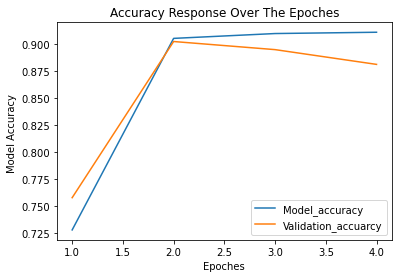

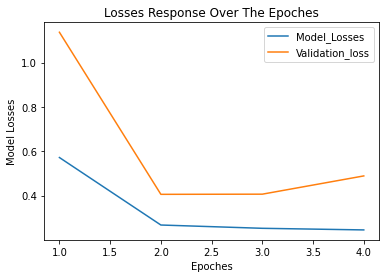

In [45]:
learning_curve(history,4)

## Test Of The Model

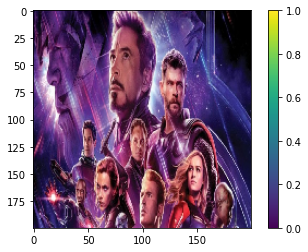

In [46]:
image = load_img('endgame.jpg',target_size=(200,200,3))
image = img_to_array(image)
image = image/255.0
plt.imshow(image)
plt.colorbar()
image = image.reshape(1,200,200,3)

In [47]:
image.shape

(1, 200, 200, 3)

In [48]:
classes = data.columns[2:]

In [49]:
classes

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [50]:
y_prob = model.predict(image)
y_prob

array([[0.05693075, 0.06080598, 0.00319114, 0.10159826, 0.03405625,
        0.11958253, 0.07627016, 0.65451705, 0.03215009, 0.24599522,
        0.02035525, 0.30784023, 0.00484461, 0.00357807, 0.4513536 ,
        0.00407508, 0.00488794, 0.00323203, 0.09382939, 0.0665881 ,
        0.05563575, 0.00931689, 0.21286121, 0.00257236, 0.00157268]],
      dtype=float32)

In [51]:
top3 = y_prob.argsort()[0]  #always decending order or we can ascending=False
top3

array([24, 23,  2, 17, 13, 15, 12, 16, 21, 10,  8,  4, 20,  0,  1, 19,  6,
       18,  3,  5, 22,  9, 11, 14,  7], dtype=int64)

In [52]:
top3 = top3[:-4:-1]
top3

array([ 7, 14, 11], dtype=int64)

In [53]:
for i in range(3):
  print(classes[top3[i]])

Drama
Mystery
Horror


## Second Image

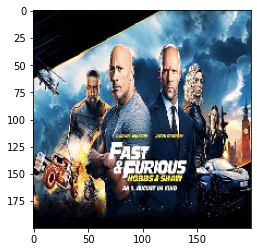

In [55]:
image = load_img('fast.jpg',target_size=(200,200,3))
image  = img_to_array(image)
image = image/255.0
plt.imshow(image)

image = image.reshape(1,200,200,3)

In [56]:
classes = data.columns[2:]
classes

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [57]:
y_prob = model.predict(image)
y_prob

array([[3.0687642e-01, 9.9925995e-03, 1.1613071e-03, 2.2378594e-02,
        2.1181762e-02, 8.2797110e-03, 6.5395027e-02, 9.1764867e-02,
        8.4385276e-04, 5.5411339e-02, 6.9907308e-04, 1.3763139e-01,
        6.9379807e-05, 5.8144331e-05, 8.7912560e-02, 6.9648027e-05,
        3.3676624e-05, 2.7552545e-03, 1.2236238e-03, 5.1687360e-03,
        1.9699335e-05, 1.2378693e-03, 8.5612237e-03, 2.5331974e-05,
        1.3418387e-04]], dtype=float32)

In [58]:
y_prob = y_prob.argsort()[0]
y_prob

array([20, 23, 16, 13, 12, 15, 24, 10,  8,  2, 18, 21, 17, 19,  5, 22,  1,
        4,  3,  9,  6, 14,  7, 11,  0], dtype=int64)

In [59]:
top3 = y_prob[:-4:-1]
top3

array([ 0, 11,  7], dtype=int64)

In [60]:
for i in range(3):
  print(classes[top3[i]])

Action
Horror
Drama


## Third Image

Drama
Mystery
Horror


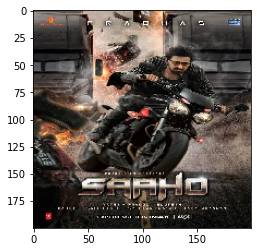

In [61]:
image = load_img('saaho.jpg',target_size=(200,200,3))
image  = img_to_array(image)
image  = image/255.0
plt.imshow(image)
image = image.reshape(1,200,200,3)

y_prob = model.predict(image)
y_prob

y_prob = y_prob.argsort()[0]
y_prob

top3 = y_prob[:-4:-1]
top3

for i in range(3):
  print(classes[top3[i]])